In [2]:
#importing necessary modules

import numpy as np
import matplotlib.pyplot as plt
import pydicom
from PIL import Image

In [3]:
#listing path names for images

pre_path = 'data/manifest-1722210581008/ISPY2/ISPY2-100899/10-26-2002-100899T0-ISPY2MRIT0-88595/500.000000-ISPY2 AX VIBRANT-SERIES-52523/1-042.dcm'
post_path = 'data/manifest-1722210581008/ISPY2/ISPY2-100899/10-26-2002-100899T0-ISPY2MRIT0-88595/501.000000-ISPY2 Ph1AX VIBRANT-SERIES-03969/1-042.dcm'

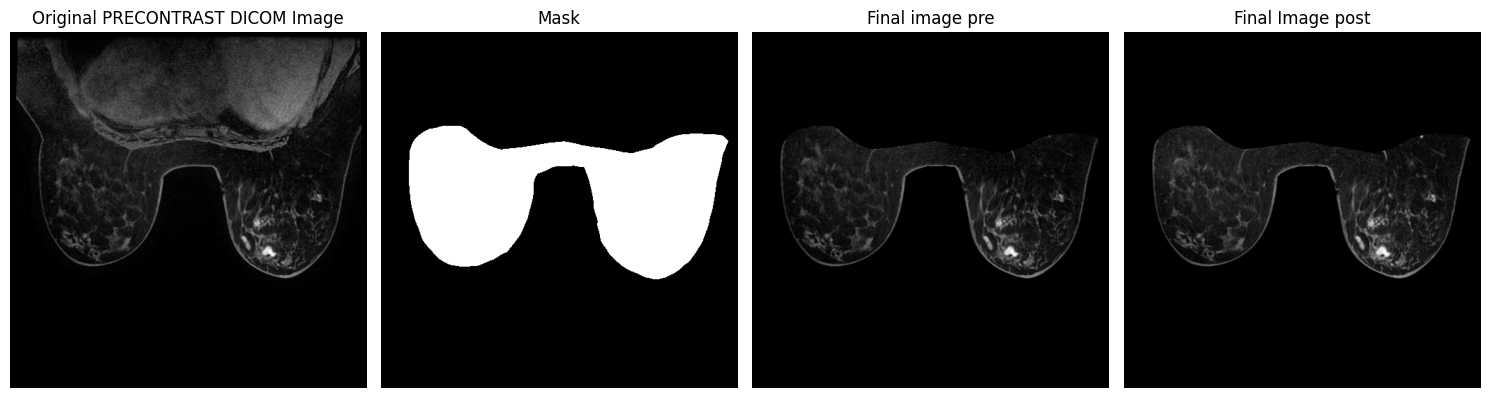

In [4]:


#data preparation
dicom_path = pre_path
dicom_image = pydicom.dcmread(dicom_path)
predicom_array = dicom_image.pixel_array

dicom_path2 = post_path
dicom_image2 = pydicom.dcmread(dicom_path2)
postdicom_array = dicom_image2.pixel_array


mask_path = 'mask/precontrast_mask.png'
mask_image = Image.open(mask_path).convert('L')  #make sure it's greyscale 
mask_array = np.array(mask_image)


#0 or 1
mask_array = (mask_array > 0).astype(np.uint8)


#The multiplication
masked_array = predicom_array * mask_array
masked_array2 = postdicom_array * mask_array


#Save the array 
np.save('saved_data/masked_array.npy', masked_array)
np.save('saved_data/masked_array2.npy', masked_array2)


#Plotting our results below
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(predicom_array, cmap='gray')
axes[0].set_title('Original PRECONTRAST DICOM Image')
axes[0].axis('off')

axes[1].imshow(mask_array, cmap='gray')
axes[1].set_title('Mask')
axes[1].axis('off')

axes[2].imshow(masked_array, cmap='gray')
axes[2].set_title('Final image pre')
axes[2].axis('off')

axes[3].imshow(masked_array2, cmap='gray')
axes[3].set_title('Final Image post')
axes[3].axis('off')



plt.tight_layout()
plt.show()


Now plotting a histogram of the signal intensities for masked_array and masked_array2

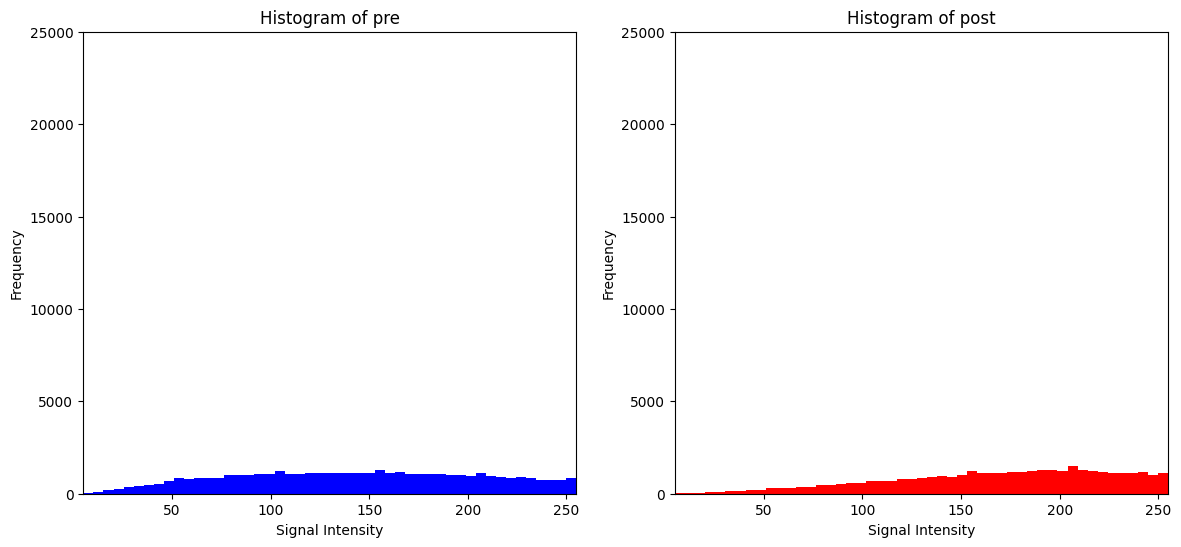

In [18]:

#flattening to 2D (optional)
masked_array_flat = masked_array.flatten()
masked_array2_flat = masked_array2.flatten()


plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(masked_array_flat, bins=50, color='blue',  range=(0, 255))
plt.title('Histogram of pre')
plt.xlabel('Signal Intensity')
plt.ylabel('Frequency')
plt.xlim(5, 255)
plt.ylim(0, 25000)


plt.subplot(1, 2, 2)
plt.hist(masked_array2_flat, bins=50, color='red',  range=(0, 255))
plt.title('Histogram of post')
plt.xlabel('Signal Intensity')
plt.ylabel('Frequency')
plt.xlim(5, 255)
plt.ylim(0, 25000)

plt.show()




/var/folders/b4/f9cfwzrj0f9b068c1r788q6m0000gp/T/ipykernel_59538/976143745.py:14: RuntimeWarning: divide by zero encountered in divide
  plt.hist((masked_array2_flat-masked_array_flat)/(masked_array_flat), bins=50, color='red',  range=(0, 255))
/var/folders/b4/f9cfwzrj0f9b068c1r788q6m0000gp/T/ipykernel_59538/976143745.py:14: RuntimeWarning: invalid value encountered in divide
  plt.hist((masked_array2_flat-masked_array_flat)/(masked_array_flat), bins=50, color='red',  range=(0, 255))


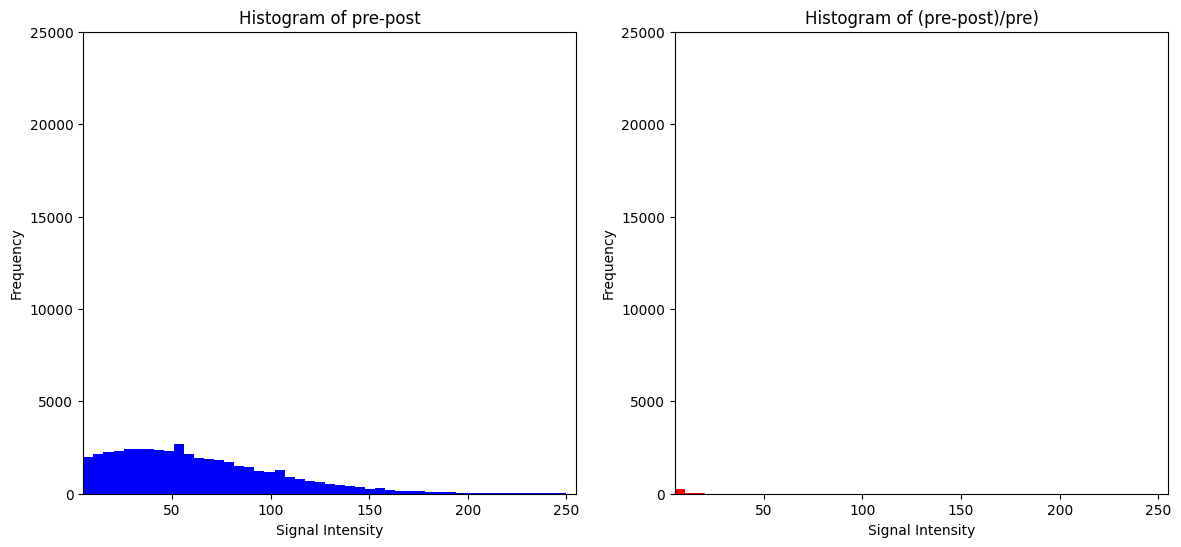

In [17]:
#more graphs for visualization

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(masked_array2_flat-masked_array_flat, bins=50, color='blue',  range=(0, 255))
plt.title('Histogram of pre-post')
plt.xlabel('Signal Intensity')
plt.ylabel('Frequency')
plt.xlim(5, 255)
plt.ylim(0, 25000)


plt.subplot(1, 2, 2)
plt.hist((masked_array2_flat-masked_array_flat)/(masked_array_flat), bins=50, color='red',  range=(0, 255))
plt.title('Histogram of (pre-post)/pre)')
plt.xlabel('Signal Intensity')
plt.ylabel('Frequency')
plt.xlim(5, 255)
plt.ylim(0, 25000)

plt.show()


Finally, we are going to calculate BPE

/var/folders/b4/f9cfwzrj0f9b068c1r788q6m0000gp/T/ipykernel_1009/3168911536.py:9: RuntimeWarning: divide by zero encountered in divide
  bpe_percentage = np.where(pre_array != 0, (post_array - pre_array) / pre_array * 100, 0)
/var/folders/b4/f9cfwzrj0f9b068c1r788q6m0000gp/T/ipykernel_1009/3168911536.py:9: RuntimeWarning: invalid value encountered in divide
  bpe_percentage = np.where(pre_array != 0, (post_array - pre_array) / pre_array * 100, 0)


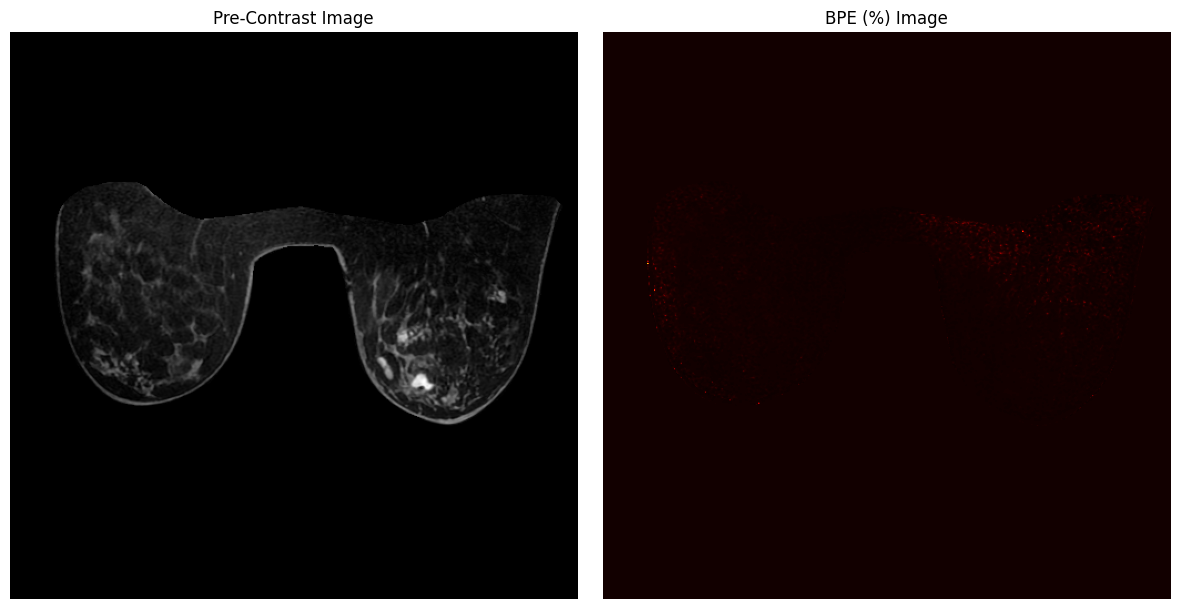

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Load arrays from .npy files
pre_array = np.load('saved_data/masked_array.npy')
post_array = np.load('saved_data/masked_array2.npy')

# Calculate BPE as a percentage
bpe_percentage = np.where(pre_array != 0, (post_array - pre_array) / pre_array * 100, 0)

# Normalize for display (0 to 255 range)
bpe_normalized = np.clip(((bpe_percentage - bpe_percentage.min()) / (bpe_percentage.max() - bpe_percentage.min()) * 255), 0, 255).astype(np.uint8)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(pre_array, cmap='gray')
plt.title('Pre-Contrast Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bpe_normalized, cmap='hot')
plt.title('BPE (%) Image')
plt.axis('off')

plt.tight_layout()
plt.show()
